# Исследование закономерностей, определяющих успешность игр

## Описание проекта
### Задачи проекта
Цель работы - выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании на 2017-й год для интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные до 2016 года о продажах игр, оценках пользователей и экспертов, жанрах и платформах (например, Xbox или PlayStation).

### План работы
* Изучить общую информацию
* Подготовить данные
* Провести исследовательский анализ данных
* Составить портрет пользователя каждого региона
* Проверить гипотезы
* Сделать общие выводы

### Описание данных
* `Name` — название игры
* `Platform` — платформа
* `Year_of_Release` — год выпуска
* `Genre` — жанр игры
* `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
* `EU_sales` — продажи в Европе (миллионы проданных копий)
* `JP_sales` — продажи в Японии (миллионы проданных копий)
* `Other_sales` — продажи в других странах (миллионы проданных копий)
* `Critic_Score` — оценка критиков (максимум 100)
* `User_Score` — оценка пользователей (максимум 10)
* `Rating` — рейтинг от организации ESRB.

## Обзор данных, изучение общей информации

In [1]:
# импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
# загружаю данные
df = pd.read_csv('games.csv')
df.head(10)    

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Вывод

После обзора данных определены следующие задачи для их предобработки:
1. Привести к нижнему регистру названия столбцов;
2. Изменить типы значений, которые потребуются для расчетов:
    - Year_of_Release с float64 на int
    - User_Score с object на float64
3. Обработать пропуски:
    - Name
    - Year_of_Release
    - Genre
    - Critic_Score
    - User_Score
    - Rating
4. Посчитать суммарные продажи во всех регионах.

## Подготовка данных

In [4]:
#перевожу названия столбцов к нижнему регистру
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [5]:
#меняю тип даныых в Year_of_Release с float64 на int
df['year_of_release'] = pd.array(df['year_of_release'], dtype='Int64')

In [6]:
#меняю тип даныых в User_Score с object на float64
df['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

Среди числовых значений столбца user_score встречается значение "tbd", аббревиатура, означающая, что информация не определена, что в текущем исследовании равносильно отсутствию значения.

In [7]:
df['user_score'] = df['user_score'].replace('tbd', np.NaN)
df['user_score'] = df['user_score'].astype('float64')

In [8]:
# обработка пропусков в 'name'
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Пропуски в "name" совпадают с пропусками в "genre", также для этих игр не заполнены оценки и ретинг, так как таких пропусков всего два, их значения не оказывают существенного влияния на результаты, поэтому можно избавиться от них.

In [9]:
df =  df.dropna(subset=['name'])

In [10]:
#обработка пропусков в "year_of_release"
df[df['year_of_release'].isna()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


In [11]:
#проверка пропусков года релиза по отдельной игре
df[df['name'] == 'Madden NFL 2004']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
1881,Madden NFL 2004,XB,2003,Sports,1.02,0.02,0.00,0.05,92.0,8.3,E
3889,Madden NFL 2004,GC,2003,Sports,0.40,0.10,0.00,0.01,94.0,7.7,E
5708,Madden NFL 2004,GBA,2003,Sports,0.22,0.08,0.00,0.01,70.0,6.6,E


In [12]:
#проверка пропусков года релиза по отдельной игре
df[df['name'] == 'Space Invaders']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
4264,Space Invaders,SNES,1994,Shooter,0.00,0.00,0.46,0.00,NaN,NaN,NaN
8580,Space Invaders,N64,1999,Shooter,0.13,0.03,0.00,0.00,NaN,NaN,NaN
10383,Space Invaders,GBA,2002,Shooter,0.08,0.03,0.00,0.00,NaN,NaN,NaN


Год выхода некоторых игр на разных платформах очень сильно отличается, поэтому будет неправильно использовать год выпуска на других платформах с группировкой по названию для заполнения пропусков "year_of_release", поэтому лучше не заполнять пропуски совсем.

Оценки критиков и пользователей таккже могут отличаться в зависимости от платформы, а то, что количество пропусков в эих столбцах различное может говорить о том, что тип оценки не ведется на некоторых платформах, поэтому нет оптимального способа заполнить пропуски в "critic_score" и "user_score".

Пропуски в "rating" могут означать, что игра не проходила оценку ESRB, поэтому в зполнении пропусков этого столбца нет смысла.

In [13]:
#суммарные продажи
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
13834,Clannad,PS2,2006,Adventure,0.00,0.00,0.04,0.00,NaN,NaN,NaN,0.04
14761,Diabolik Lovers: Lunatic Parade,PSV,2016,Adventure,0.00,0.00,0.03,0.00,NaN,NaN,NaN,0.03
10580,Disney's The Haunted Mansion,GC,2003,Platform,0.08,0.02,0.00,0.00,NaN,NaN,NaN,0.10
12371,Arc the Lad: End of Darkness,PS2,2004,Role-Playing,0.03,0.02,0.00,0.01,59.0,4.2,T,0.06
2038,Harry Potter and the Prisoner of Azkaban,PS2,2004,Action,0.50,0.39,0.00,0.13,70.0,8.7,E,1.02


In [14]:
#проверка дубликатов
df.duplicated().sum()

0

### Вывод
Все названия столбцов приведены к нижнему регистру. Изменены типы данных в столбцах "year_of_release" и "user_score". Удалены строки с пропусками в "name" и "genre", пропуски в "year_of_release", "critic_score", "user_score" и "rating" оставлены без изменений, так как по разным причинам не нашлось оптимального способа для заполнения. Добавлена общая сумма продаж.

## Исследовательский анализ данных

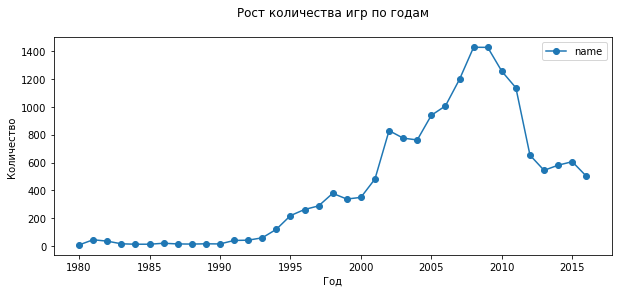

In [15]:
(df
 .pivot_table(index='year_of_release', values='name', aggfunc='count')
 .plot(kind='line', figsize=(10,4),  style = 'o-')
)
plt.title('Рост количества игр по годам'+ "\n")
plt.xlabel('Год')
plt.ylabel('Количество');

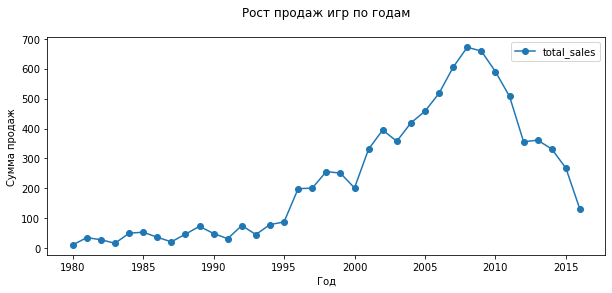

In [16]:
(df
 .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
 .plot(kind='line', figsize=(10,4),  style = 'o-')
)
plt.title('Рост продаж игр по годам'+ "\n")
plt.xlabel('Год')
plt.ylabel('Сумма продаж');

Можем наблюдать, что с 1994 изменения в количестве выпусков и объеме продаж происходит активнее, значительно, хоть и не равномерно, прирастает вплоть до 2008 года, а с 2009 начинает резко снижаться, количество выпусков в 2016 близко по значению к 2001.

In [17]:
#составляю рейтинг продаж платформ
platform_total_sales = df.pivot_table(index='platform', values='total_sales', aggfunc='sum')
platform_total_sales.sort_values(by='total_sales', ascending=False).head(15)

,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


Разница в продажах у шестой(PS) и седьмой(GBA) позиций рейтинга более чем в два раза, далее рассмотрим, как распределялись продажи у топ-6 по годам.

In [18]:
top_6_platforms = platform_total_sales.sort_values(by='total_sales', ascending=False).head(6)
df_top_6_platforms = df.query('platform in @top_6_platforms.index')

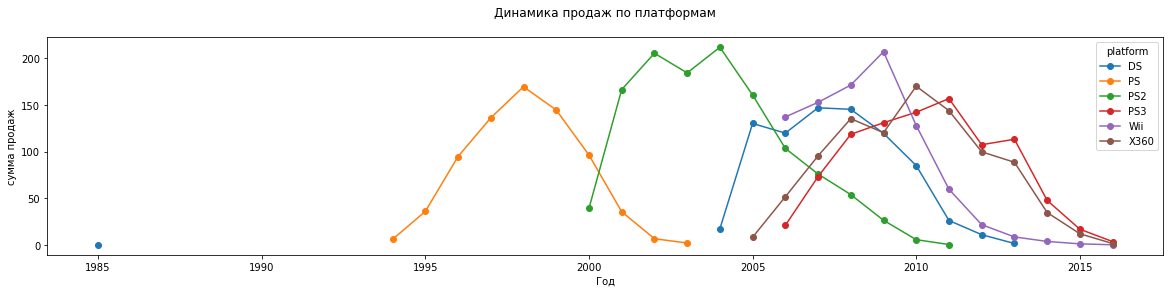

In [19]:
(df_top_6_platforms
 .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
 .plot(kind='line', figsize=(20,4),  style = 'o-')
)
plt.title('Динамика продаж по платформам'+ "\n")
plt.xlabel('Год')
plt.ylabel('сумма продаж');

Значение с 1985 годом по платформе DS ошибочное, в это время платформа начала работать гораздо позже, в 2004.

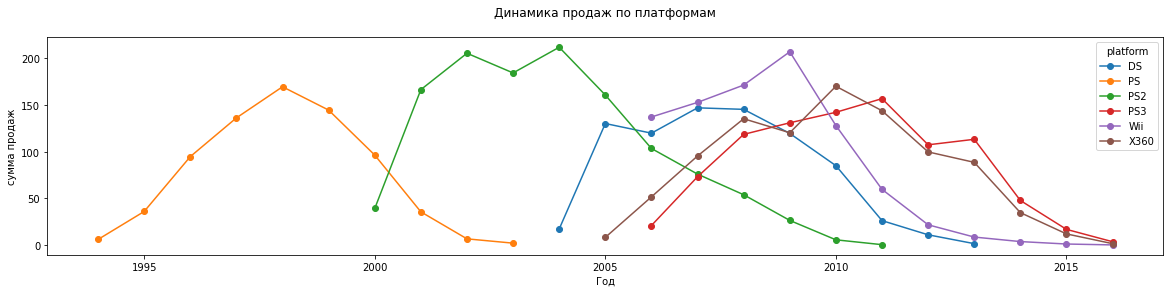

In [20]:
#динамика продаж по топовым платформам без ошибочного значения в DS
(df_top_6_platforms
 .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
 .query('year_of_release != 1985')
 .plot(kind='line', figsize=(20,4),  style = 'o-')
)
plt.title('Динамика продаж по платформам'+ "\n")
plt.xlabel('Год')
plt.ylabel('сумма продаж');

Срок продолжительности "жизни" популярной платформы - 9-11 лет, пик продаж обычно происходит в четвертый-пятый год. Исходя из того, что сейчас декабрь 2016го, будем рассматривать продажи с 2014 (2016г - 3 года период выхода платформы на пик продаж), учитывая рост до 2015, так как данные за 2016 год могут быть собраны не до конца.

In [21]:
#создаю датафрейм актуального периода
df_current_period = df[df['year_of_release'] > 2013]
df_current_period.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98


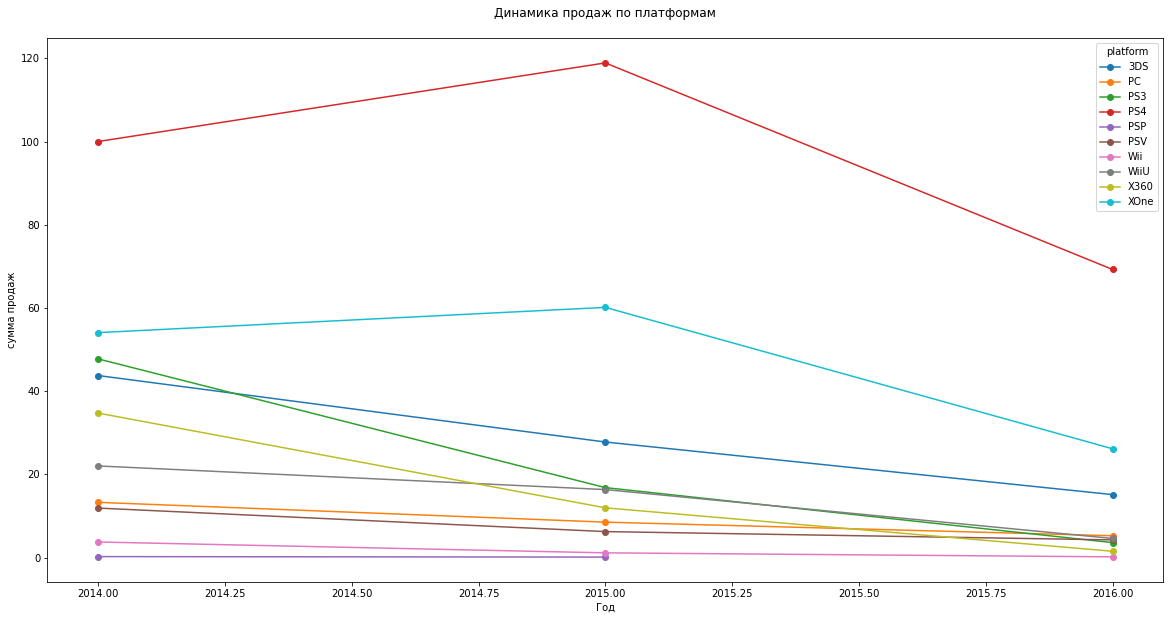

In [22]:
(df_current_period
 .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
 .plot(kind='line', figsize=(20,10),  style = 'o-')
)
plt.title('Динамика продаж по платформам'+ "\n")
plt.xlabel('Год')
plt.ylabel('сумма продаж');

В 2015 лидерами продж выступают PS4, XOne, 3DS, PS3 и WiiU, из них PS4, XOne прирастают и по обеим платформам ожидается рост на протяжении 2017го года. Продажи платформы WiiU в 2015 ниже, чем в 2014, но спад небольшой, возможен рост в течение 2017 года, но все-таки это более рисковая платформа. 3DS и PS3 падают в продажах на протяжении последних 2х лет. 

(0.0, 1.0)

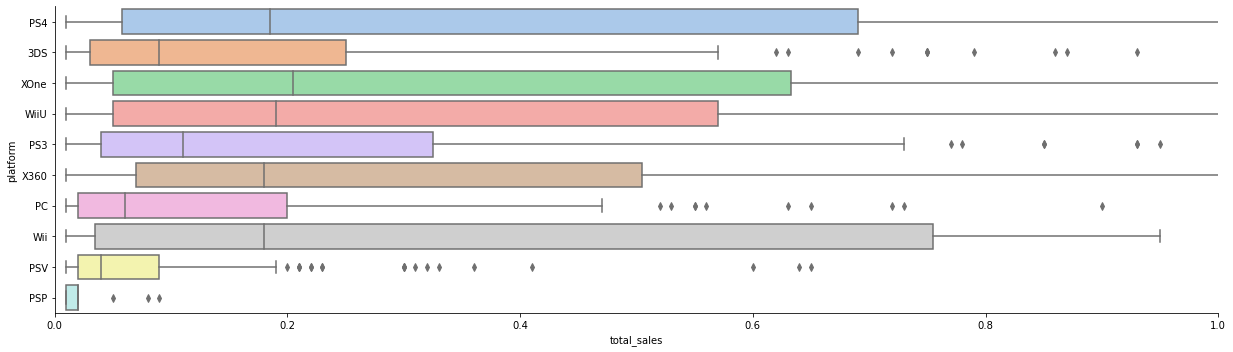

In [23]:
g = sns.catplot(y='platform', x='total_sales', kind='box', data=df_current_period, orient='h', palette = 'pastel')
g.fig.set_figwidth(20)
g.fig.set_figheight(5)
plt.xlim(0,1)

In [24]:
(df_current_period.pivot_table(index='platform', values='total_sales', aggfunc=['sum', 'median']))

,sum,median
,total_sales,total_sales
platform,,
3DS,86.68,0.090
PC,27.05,0.060
PS3,68.18,0.110
PS4,288.15,0.185
PSP,0.36,0.020
PSV,22.40,0.040
Wii,5.07,0.180
WiiU,42.98,0.190


По диаграмме размаха видим, что по основному объему продаж лидируют X360, PS4, XOne, PS3, WiiU и Wii, у каждой платформы много игр, которые продавались значительно больше, чем среднее по группе, если сравнивать этот показать на ранее заинтересовавших нас PS4 и XOne, то для PS4 размах таких выбросов значительно больше.

Оценка по медианным значениям немного меняет рейтинг: XOne, WiiU, PS4, Wii, X360 и PS3. Потенциально продажи на платформах XOne и WiiU прибыльнее.

0.40266141068104083

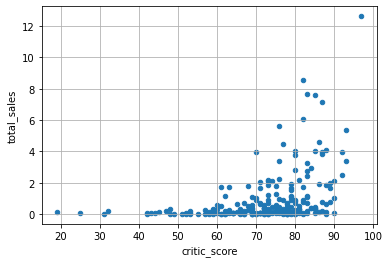

In [25]:
#взаимосвязь продаж и отзывов критиков по платформе PS4
df_current_period.query('platform == "PS4"').plot(x='critic_score', y='total_sales', kind='scatter', grid=True)
df_current_period.query('platform == "PS4"')['critic_score'].corr(df_current_period.query('platform == "PS4"')['total_sales'])

-0.040131589472697286

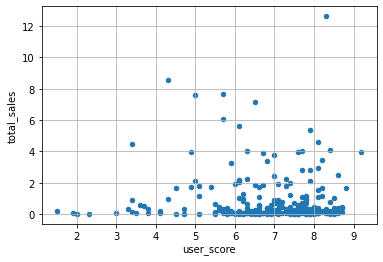

In [26]:
#взаимосвязь продаж и отзывов пользователей по платформе PS4
df_current_period.query('platform == "PS4"').plot(x='user_score', y='total_sales', kind='scatter', grid=True)
df_current_period.query('platform == "PS4"')['user_score'].corr(df_current_period.query('platform == "PS4"')['total_sales'])

Взаимосвязь между уровнем продаж на платформе PS4 и оценкой критиков очень слабая, еще меньше рост продаж на платформе связан с оценкой пользователей. Действительно игры, лидирующие в родажах имеют оценки критиков не ниже 70, но корреляция этих показателей слабая, поэтому мы не можем утверждать, что на этот рост повлияла именно популярность среди критиков. При этом еще чаще высокие продажи сопровождаются низкой оценкой пользователей, что говорит нам о том, что пользовательские оценки не влияют на популярность игры.  

Корреляция платформы XOne : 0.428676943703332
Диаграмма рассеяния платформы XOne


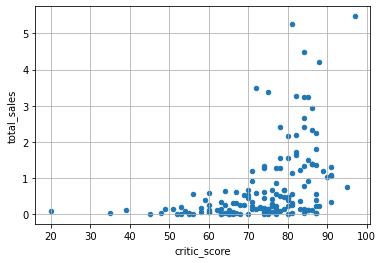

Корреляция платформы 3DS : 0.3141174928690509
Диаграмма рассеяния платформы 3DS


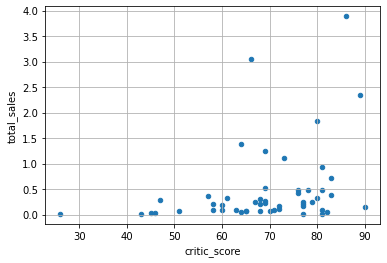

Корреляция платформы PS3 : 0.44657460493190715
Диаграмма рассеяния платформы PS3


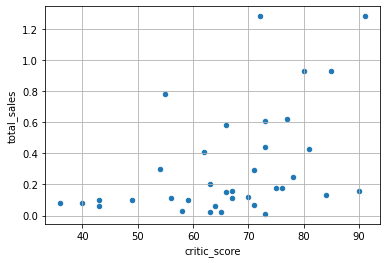

Корреляция платформы WiiU : 0.370201412480884
Диаграмма рассеяния платформы WiiU


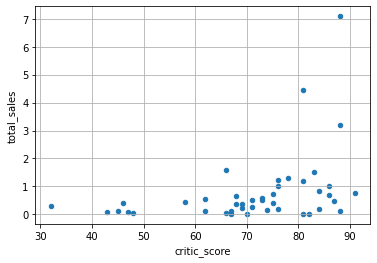

In [27]:
# взаимосвязь продаж и отзывов критиков по платформам XOne, 3DS,PS3,WiiU
list = ["XOne", "3DS", "PS3", "WiiU"]
for list_pl in list:
    print('Корреляция платформы', list_pl,':', df_current_period[df_current_period.platform == list_pl].critic_score.corr(
        df_current_period[df_current_period.platform == list_pl].total_sales))
    print('Диаграмма рассеяния платформы', list_pl)
    df_current_period[df_current_period.platform == list_pl].plot(x='critic_score', y='total_sales', kind='scatter', grid=True)
    plt.show()

Корреляция платформы XOne : -0.07038392806475818
Диаграмма рассеяния платформы XOne


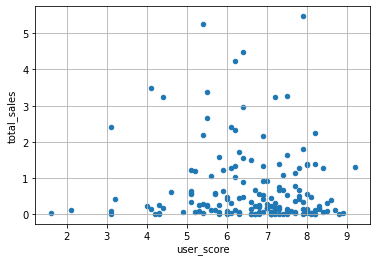

Корреляция платформы 3DS : 0.2151932718527028
Диаграмма рассеяния платформы 3DS


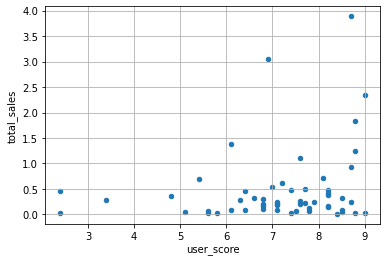

Корреляция платформы PS3 : -0.16676141347662107
Диаграмма рассеяния платформы PS3


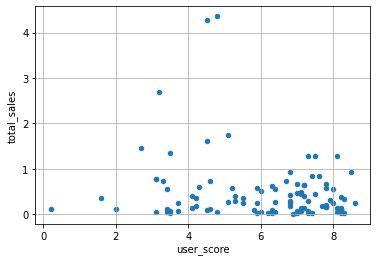

Корреляция платформы WiiU : 0.40792645792170795
Диаграмма рассеяния платформы WiiU


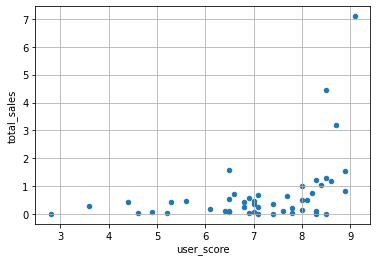

In [28]:
# взаимосвязь продаж и отзывов пользователей по платформам XOne, 3DS,PS3,WiiU
list = ["XOne", "3DS", "PS3", "WiiU"]
for list_pl in list:
    print('Корреляция платформы', list_pl,':', df_current_period[df_current_period.platform == list_pl].user_score.corr(
        df_current_period[df_current_period.platform == list_pl].total_sales))
    print('Диаграмма рассеяния платформы', list_pl)
    df_current_period[df_current_period.platform == list_pl].plot(x='user_score', y='total_sales', kind='scatter', grid=True)
    plt.show()

Взаимосвязь продаж с оценками пользователей и критиков по другим популярным платформим также слаба как было в разрезе PS4, то есть оценки не оказывают влияния на рост продаж.

In [29]:
#составляю рейтинг продаж по жанрам за актуальный период
df_current_period.pivot_table(index='genre', values='total_sales', aggfunc='median').sort_values(by='total_sales', ascending=False)

,total_sales
genre,
Shooter,0.515
Sports,0.180
Platform,0.140
Fighting,0.125
Role-Playing,0.110
Simulation,0.100
Action,0.090
Misc,0.090
Racing,0.090


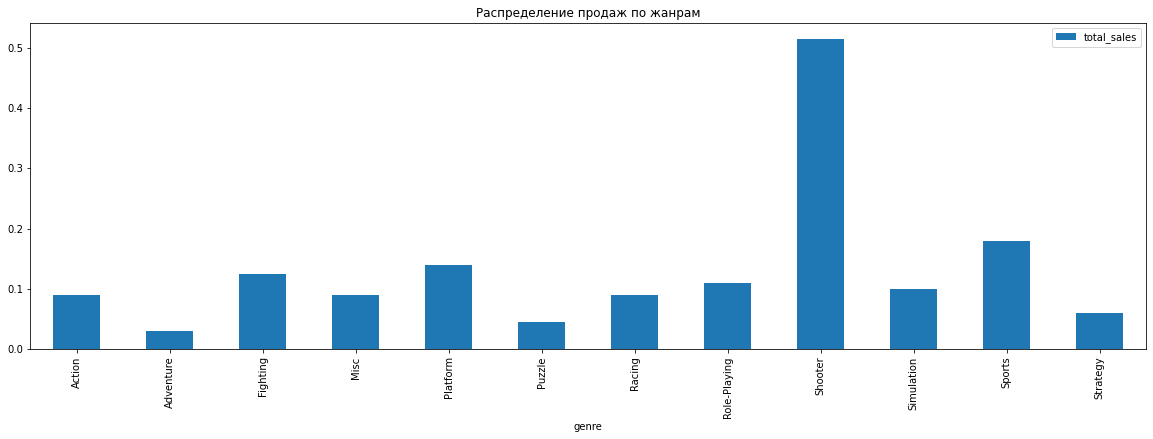

In [30]:
#Распределение продаж по жанрам
(df_current_period
 .pivot_table(index='genre', values='total_sales', aggfunc='median')
 .plot(kind='bar', figsize=(20,6))
)
plt.title('Распределение продаж по жанрам');

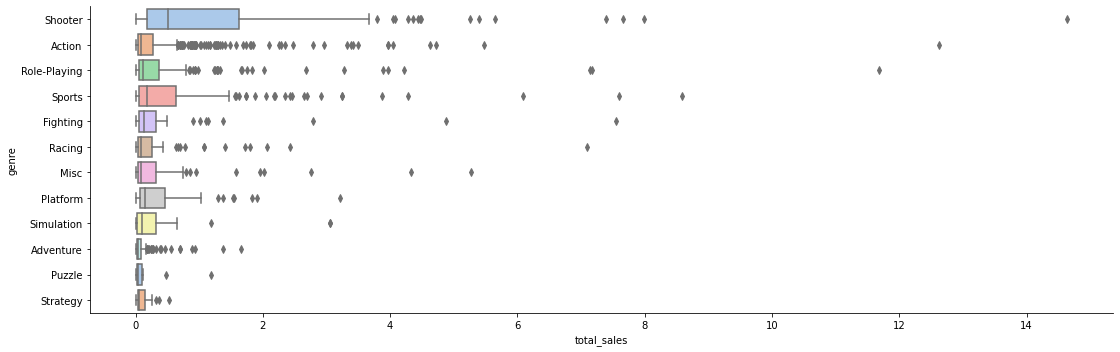

In [31]:
g = sns.catplot(kind='box', y='genre', x='total_sales',  data=df_current_period, orient='h', palette = 'pastel')
g.fig.set_figwidth(20)
g.fig.set_figheight(5)

Оценка по медианным значениям выявляет наиболее устойчивые в прдажах жанры. Первое место в такой оценке с большим отрывом занимает Shooter, Sports, Platform, Fighting, Role-Playing. Самые низкие значения у Puzzle и Adventure.

### Вывод
В среднем платформа живет 10 лет, больше всего продает в 4-5 годы, поэтому нам стоит обратить внимание на те, которые наращивают продажи с 2014, к таким относятся PS4, XOne. Оценки критиков и пользователей не влияют на объем продаж, а вот жанр играет определяющую роль, Shooter потенциально успешный вариант, а вот Adventure и Puzzle - рисковые.

## Портрет пользователя каждого региона

In [32]:
#топ-5 платформ для региона NA
(df_current_period.pivot_table(index='platform', values='na_sales', aggfunc='sum')
 .sort_values(by='na_sales', ascending=False).head()
)

,na_sales
platform,
PS4,98.61
XOne,81.27
X360,28.30
3DS,22.64
PS3,22.05


In [33]:
#топ-5 платформ для региона EU
(df_current_period.pivot_table(index='platform', values='eu_sales', aggfunc='sum')
 .sort_values(by='eu_sales', ascending=False).head()
)

,eu_sales
platform,
PS4,130.04
XOne,46.25
PS3,25.54
PC,17.97
3DS,16.12


In [34]:
#топ-5 платформ для региона JP
(df_current_period.pivot_table(index='platform', values='jp_sales', aggfunc='sum')
 .sort_values(by='jp_sales', ascending=False).head()
)

,jp_sales
platform,
3DS,44.24
PS4,15.02
PSV,14.54
PS3,11.22
WiiU,7.31


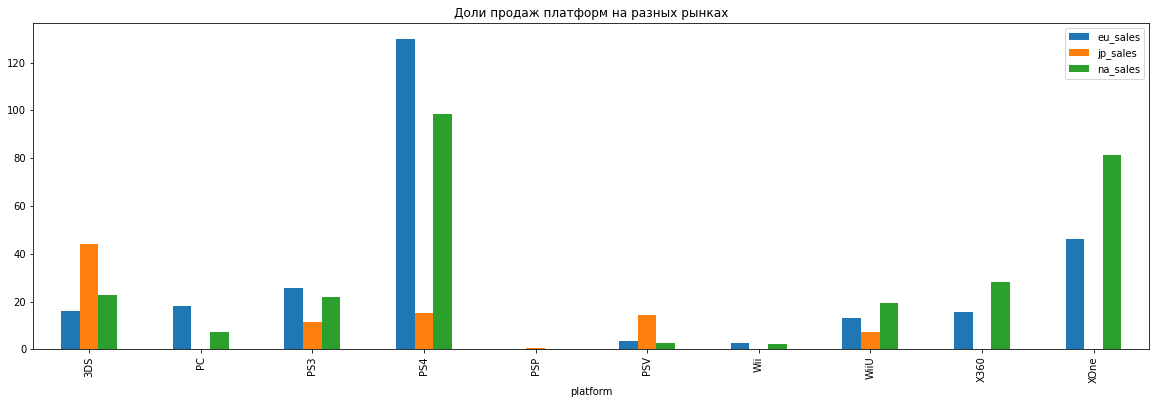

In [35]:
#Доли продаж платформ на разных рынках
(df_current_period.pivot_table(index='platform', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
 .plot(kind='bar', figsize=(20,6))
)
plt.title('Доли продаж платформ на разных рынках');

Топ-5 платформ на рынках Северной Америки и Европы практически не отличается по своему составу и по объемам продаж. Рынок Японии представлен меньшими продажами, что можно объяснить численностью населения, там популярны платформы PSP и PSV, доля продаж которых в Японии значительно превышает рынки Европы и Северной Америки, где эти платформы не вхотят в топ-5. Платформа 3DS популярна в каждом регионе, но по продажам в Японии она на первом месте и при этом ее продажи в этом регионе превышают продажи на других рынках.

In [36]:
#топ-5 жанров для региона NA
(df_current_period.pivot_table(index='genre', values='na_sales', aggfunc='sum')
 .sort_values(by='na_sales', ascending=False).head()
)

,na_sales
genre,
Shooter,79.02
Action,72.53
Sports,46.13
Role-Playing,33.47
Misc,15.05


In [37]:
#топ-5 жанров для региона EU
(df_current_period.pivot_table(index='genre', values='eu_sales', aggfunc='sum')
 .sort_values(by='eu_sales', ascending=False).head()
)

,eu_sales
genre,
Action,74.68
Shooter,65.52
Sports,45.73
Role-Playing,28.17
Racing,14.13


In [38]:
#топ-5 жанров для региона JP
(df_current_period.pivot_table(index='genre', values='jp_sales', aggfunc='sum')
 .sort_values(by='jp_sales', ascending=False).head()
)

,jp_sales
genre,
Role-Playing,31.16
Action,29.58
Fighting,6.37
Misc,5.61
Shooter,4.87


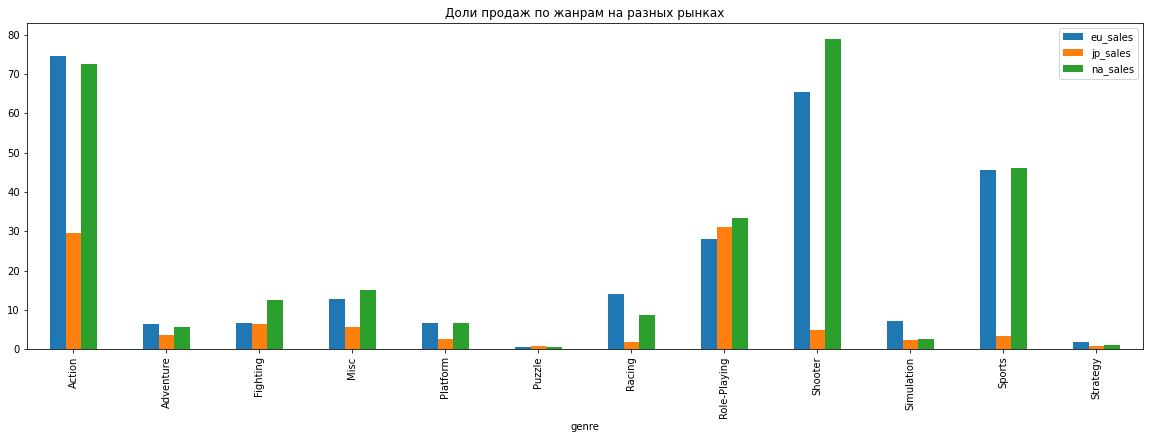

In [39]:
#Доли продаж по жанрам на разных рынках
(df_current_period.pivot_table(index='genre', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
 .plot(kind='bar', figsize=(20,6))
)
plt.title('Доли продаж по жанрам на разных рынках');

Популярные жанры в Европе и Северной Америке почти совпадают, культуры стран этих регионов близки и тесно связаны, это определяет предпочтения потребителей. Японский рынок отличается по жанровым предпочтениям, самый продаваемый Action здесь на втором месте, самым популярным является Role-Playing, а второй по популярности в Северной Америке и Европе Shooter не входит в топ-5 Японии. 

In [40]:
#заполним пропуски в рейтинге единыым значением
df_current_period['rating'] = df_current_period['rating'].fillna('xyz')

C:\Users\1\AppData\Local\Temp/ipykernel_12804/3669800380.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_period['rating'] = df_current_period['rating'].fillna('xyz')


In [41]:
#Распределение продаж по рейтингу для региона NA
(df_current_period.pivot_table(index='rating', values='na_sales', aggfunc='sum')
 .sort_values(by='na_sales', ascending=False)
)

,na_sales
rating,
M,96.42
xyz,64.72
E,50.74
T,38.95
E10+,33.23


In [42]:
#Распределение продаж по рейтингу для региона EU
(df_current_period.pivot_table(index='rating', values='eu_sales', aggfunc='sum')
 .sort_values(by='eu_sales', ascending=False)
)

,eu_sales
rating,
M,93.44
xyz,58.95
E,58.06
T,34.07
E10+,26.16


In [43]:
#Распределение продаж по рейтингу для региона JP
(df_current_period.pivot_table(index='rating', values='jp_sales', aggfunc='sum')
 .sort_values(by='jp_sales', ascending=False)
)

,jp_sales
rating,
xyz,56.90
T,14.78
E,8.94
M,8.01
E10+,4.46


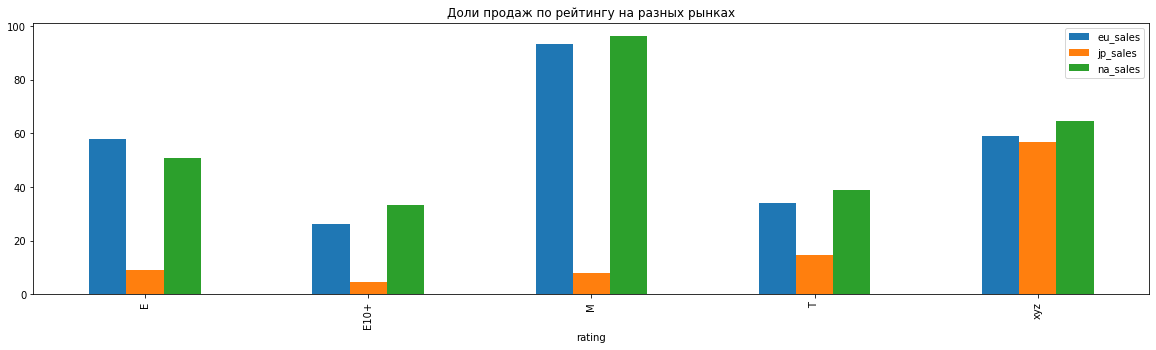

In [44]:
#Доли продаж по рейтингу на разных рынках
(df_current_period.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
 .plot(kind='bar', figsize=(20,5))
)
plt.title('Доли продаж по рейтингу на разных рынках');

В Северной Америке и Европе главными покупателями являются взрослые, продажи игр с рейтингом "М" почти в два раза превышают продажи игр с рейтингом "Е", которые предназначены для всех и содержат минимум насилия, в Японии именно такие игры занимают первое место по продажам, второе место в Японии занимают игры с рейтингом Т, для подростков, то есть этот рынок представляет младшая аудитория.

### Вывод
Рынки Северной Америки и Европы довольно похожи, основные продажи делают взрослые, их любимыми жанрами являются Action и Shooter, североамериканцы предпочитают платформу X360, а европейцы PS3. В Японии основные потребители - это несовершеннолетние, больше всего они любят жанр Role-Playing, а из платформ выбирают 3DS.

## Проверка гипотез

In [45]:
df_current_period = df_current_period.dropna(subset=['user_score'])

H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. 

H1: Средние пользовательские рейтинги платформ Xbox One и PC различаются.

Выборки по платформам независимые, поэтому для проверки применим гипотезу о равенстве средних двух генеральных совокупностей.

In [46]:
xone_user_score = df_current_period[df_current_period['platform'] == 'XOne']['user_score']
pc_user_score = df_current_period[df_current_period['platform'] == 'PC']['user_score']
alpha = .05
results = st.ttest_ind(xone_user_score, pc_user_score, equal_var=False)
display('p-значение:', results.pvalue)
if results.pvalue < alpha:
    display("Отвергаем нулевую гипотезу")
else:
    display("Не получилось отвергнуть нулевую гипотезу")

'p-значение:'

0.11601398086668832

'Не получилось отвергнуть нулевую гипотезу'

In [47]:
display(xone_user_score.mean())
display(pc_user_score.mean())

6.594545454545453

6.298360655737703

Полученное значение p-value говорит о том, что хотя рейтинги платформ Xbox One и PC неодинаковы, с вероятностью 61% такое или большее различие можно получить случайно.

H0: Средние пользовательские рейтинги жанров Action и Sports не отличаются.

H1: Средние пользовательские рейтинги жанров Action и Sports разные.

Выборки по жанрам независимые, поэтому для проверки применим гипотезу о равенстве средних двух генеральных совокупностей.

In [48]:
action_user_score = df_current_period[df_current_period['genre'] == 'Action']['user_score']
sports_user_score = df_current_period[df_current_period['genre'] == 'Sports']['user_score']
alpha = .05
results = st.ttest_ind(action_user_score, sports_user_score, equal_var=False)
display('p-значение:', results.pvalue)
if results.pvalue < alpha:
    display("Отвергаем нулевую гипотезу")
else:
    display("Не получилось отвергнуть нулевую гипотезу")

'p-значение:'

1.1825550382644557e-14

'Отвергаем нулевую гипотезу'

In [49]:
display(action_user_score.mean())
display(sports_user_score.mean())

6.760606060606054

5.225196850393697

Средние пользовательские рейтинги жанров Action и Sports отличаются, p_value указывает на то, что различия значимые и не случайные.

## Общие выводы

В ходе исследования данных о продажах игр выявлены следующие закономерности, определяющих успешность игры:
* продажи в разрезе платформ в разные годы проходят неравномерно, 4-5 годы "жизни" платформы являются самыми прибыльными, в 2017 году платформы PS4, XOne как раз будут в этом цикле;
* объемы продаж разных платформ отличаются в зависимости от региона, в Европе самые большие продажи у PS3, в Северной Америке - у X360, в Японии - у 3DS;
* пользовательские оценки и оценки критиков не оказывают влияния на продажи;
* продажи значительно различаются в зависимости от жанра игры, наиболее продающиеся Action, Shooter, Role-Playing;
* в разных регионах популярность жанров оценивается по разному, в Японии первре место у Role-Playing, в Европе и Северной Америке - Action;
* в зависимости от рейтинга ESRB продажи распределены неравномено, в Северной Америке и Европе почти половина продаж приходится на игры категории "М", в Японии продажи игр категории "Е" и "Т" занимают почти 2/3 продаж.